In [1]:
import zipfile, os
import pandas as pd

zip_path = '/content/drive/MyDrive/Misc/Data/5-14/data1.zip'
extract_path = '/content/extracted_5_15'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("📁 Extracted contents:", os.listdir(extract_path))

# Load CSVs
csvs = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
for f in csvs:
    df = pd.read_csv(os.path.join(extract_path, f))
    print(f"\n📄 File: {f} — Shape: {df.shape}")
    print(df.head())

📁 Extracted contents: ['Data']


In [2]:
zip_path = '/content/drive/MyDrive/Misc/Data/5-15/data2.zip'
extract_path = '/content/extracted_5_16'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("📁 Extracted contents:", os.listdir(extract_path))

csvs = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
for f in csvs:
    df = pd.read_csv(os.path.join(extract_path, f))
    print(f"\n📄 File: {f} — Shape: {df.shape}")
    print(df.head())


📁 Extracted contents: ['Data']


In [3]:
zip_path = '/content/drive/MyDrive/Misc/Data/5-17/data3.zip'
extract_path = '/content/extracted_5_17'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("📁 Extracted contents:", os.listdir(extract_path))

csvs = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
for f in csvs:
    df = pd.read_csv(os.path.join(extract_path, f))
    print(f"\n📄 File: {f} — Shape: {df.shape}")
    print(df.head())


📁 Extracted contents: ['data']


In [4]:
import zipfile, os
import pandas as pd

zip_path = '/content/drive/MyDrive/Misc/Data/5-18/data4.zip'  # ← Change path for each set
extract_path = '/content/extracted_5_18'
os.makedirs(extract_path, exist_ok=True)

# Unzip safely
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("📁 Extracted files:", len(os.listdir(extract_path)))

# Try reading each CSV
csvs = [f for f in os.listdir(extract_path) if f.endswith('.csv')]

for f in csvs:
    file_path = os.path.join(extract_path, f)
    try:
        df = pd.read_csv(file_path, on_bad_lines='skip')  # tolerant read
        # print(f"\n✅ Loaded: {f} — Shape: {df.shape}")
        # print(df.head(3))
    except Exception as e:
        print(f"❌ Failed: {f} — {e}")


📁 Extracted files: 150


In [5]:
zip_path = '/content/drive/MyDrive/Misc/Data/5-19/data5.zip'
extract_path = '/content/extracted_5_19'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("📁 Extracted contents:", os.listdir(extract_path))

csvs = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
for f in csvs:
    df = pd.read_csv(os.path.join(extract_path, f))
    print(f"\n📄 File: {f} — Shape: {df.shape}")
    print(df.head())


📁 Extracted contents: ['Data']


In [6]:
import os
import zipfile
import pandas as pd

# Folder setup
base_paths = {
    '5_15': '/content/extracted_5_15',
    '5_16': '/content/extracted_5_16',
    '5_17': '/content/extracted_5_17',
    '5_18': '/content/extracted_5_18',  # special case (no "Data" folder)
    '5_19': '/content/extracted_5_19'
}

all_dataframes = []

for label, path in base_paths.items():
    # Determine if subfolder 'Data' exists (most cases)
    candidate_path = os.path.join(path, 'Data')
    if os.path.exists(candidate_path):
        csv_folder = candidate_path
    else:
        csv_folder = path  # use root if no subfolder (5_18)

    # Load all CSVs
    csvs = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]
    for csv_file in csvs:
        full_path = os.path.join(csv_folder, csv_file)
        try:
            df = pd.read_csv(full_path, on_bad_lines='skip')
            df['source_file'] = csv_file         # traceability
            df['source_day'] = label             # tag with folder/day
            all_dataframes.append(df)
        except Exception as e:
            print(f"❌ Failed to load {csv_file} in {label}: {e}")

# Combine all
if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    print(f"\n✅ Combined shape: {combined_df.shape}")

    # Save to CSV
    combined_df.to_csv('/content/combined_all_days.csv', index=False)
    print("📄 Saved to: /content/combined_all_days.csv")
else:
    print("🚫 No valid CSVs to combine.")



✅ Combined shape: (8262, 4)
📄 Saved to: /content/combined_all_days.csv


In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Your pre-extracted data locations
base_paths = {
    '5_15': '/content/extracted_5_15',
    '5_16': '/content/extracted_5_16',
    '5_17': '/content/extracted_5_17',
    '5_18': '/content/extracted_5_18',
    '5_19': '/content/extracted_5_19'
}

gps_records = []

for label, base in base_paths.items():
    data_dir = os.path.join(base, 'Data') if os.path.exists(os.path.join(base, 'Data')) else base
    csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

    for f in csv_files:
        try:
            path = os.path.join(data_dir, f)
            df = pd.read_csv(path, header=None, engine='python')

            # Strip spaces and locate values
            lat_row = df[df[0].str.strip() == '% Start latitude']
            lon_row = df[df[0].str.strip() == '% Start longitude']

            if not lat_row.empty and not lon_row.empty:
                lat = float(lat_row.iloc[0, 1])
                lon = float(lon_row.iloc[0, 1])
                gps_records.append({
                    'Latitude': lat,
                    'Longitude': lon,
                    'File': f,
                    'Date': label
                })
            else:
                print(f"⚠️ Missing GPS in {f}")

        except Exception as e:
            print(f"❌ Error reading {f}: {e}")

# Compile into DataFrame
gps_df = pd.DataFrame(gps_records)

# Display and plot
if gps_df.empty:
    print("🚫 No GPS coordinates were found.")
else:
    print(f"✅ Parsed {len(gps_df)} GPS points.")
    display(gps_df.head())

    plt.figure(figsize=(10, 8))
    for date, group in gps_df.groupby("Date"):
        plt.scatter(group['Longitude'], group['Latitude'], label=date, s=50)

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("CTD Cast Locations by Day")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


❌ Error reading CC2435009_20250513_203433.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250514_171550.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250513_203453.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250513_200136.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250514_184901.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250513_195713.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250513_182851.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250514_171224.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250514_195240.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250514_174114.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250514_165357.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250513_181211.csv: Expected 2 fields in line 29, saw 8
❌ Er

In [8]:
import pandas as pd

# Replace this path with one known-good file
file_path = '/content/extracted_5_15/Data/CC2435009_20250513_182530.csv'

# Try reading the first 30 lines raw
with open(file_path, 'r') as f:
    for i in range(30):
        print(f.readline().strip())


% Device,CC2435009
% File name,CC2435009_20250513_182530
% Cast time (UTC),2025-05-13 18:25:30
% Cast time (local),2025-05-13 12:25:30
% Sample type,Cast
% Cast data,Processed
% Location source,GPS
% Default latitude,32
% Default altitude,0
% Start latitude,40.2799046
% Start longitude,-106.851733
% Start altitude,2182.89697265625
% Start GPS horizontal error(Meter),13.116999626159667
% Start GPS vertical error(Meter),24.10300064086914
% Start GPS number of satellites,6
% End latitude,40.2800949
% End longitude,-106.8520601
% End altitude,2079.2219238281248
% End GPS horizontal error(Meter),128.85000610351563
% End GPS vertical error(Meter),433.66900634765624
% End GPS number of satellites,5
% Cast duration (Seconds),36.6
% Samples per second,5
% Electronics calibration date,0001-01-01
% Conductivity calibration date,2024-10-09
% Temperature calibration date,2024-10-07
% Pressure calibration date,2024-09-17
%
Pressure (Decibar),Depth (Meter),Temperature (Celsius),Conductivity (MicroSie

In [9]:
lat = None
lon = None

with open(file_path, 'r') as f:
    for line in f:
        if '% Start latitude' in line:
            lat = float(line.split(',')[1].strip()) if ',' in line else float(line.split()[1])
        elif '% Start longitude' in line:
            lon = float(line.split(',')[1].strip()) if ',' in line else float(line.split()[1])

print("Latitude:", lat)
print("Longitude:", lon)


Latitude: 40.2799046
Longitude: -106.851733


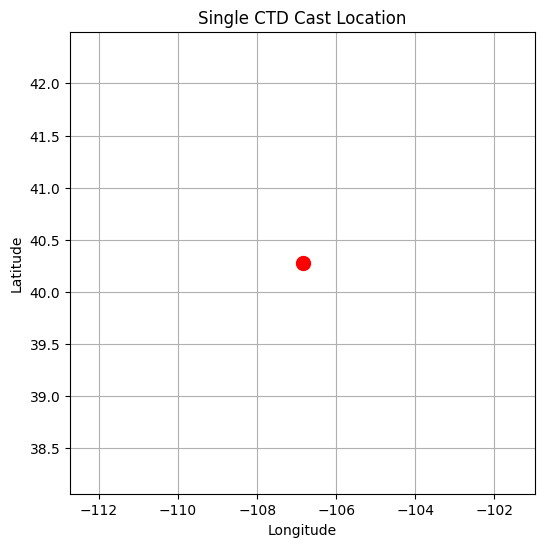

In [10]:
import matplotlib.pyplot as plt

if lat and lon:
    plt.figure(figsize=(6,6))
    plt.scatter(lon, lat, c='red', s=100)
    plt.title("Single CTD Cast Location")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()
else:
    print("🚫 No valid coordinates found in the file.")


✅ Parsed 306 cast locations.


,Latitude,Longitude,File,Date
0,40.285370,-106.854153,CC2435009_20250513_203433.csv,5_15
1,40.279760,-106.844099,CC2435009_20250514_171550.csv,5_15
2,40.285424,-106.854289,CC2435009_20250513_203453.csv,5_15
3,40.284124,-106.853656,CC2435009_20250513_200136.csv,5_15
4,40.285992,-106.854821,CC2435009_20250514_184901.csv,5_15


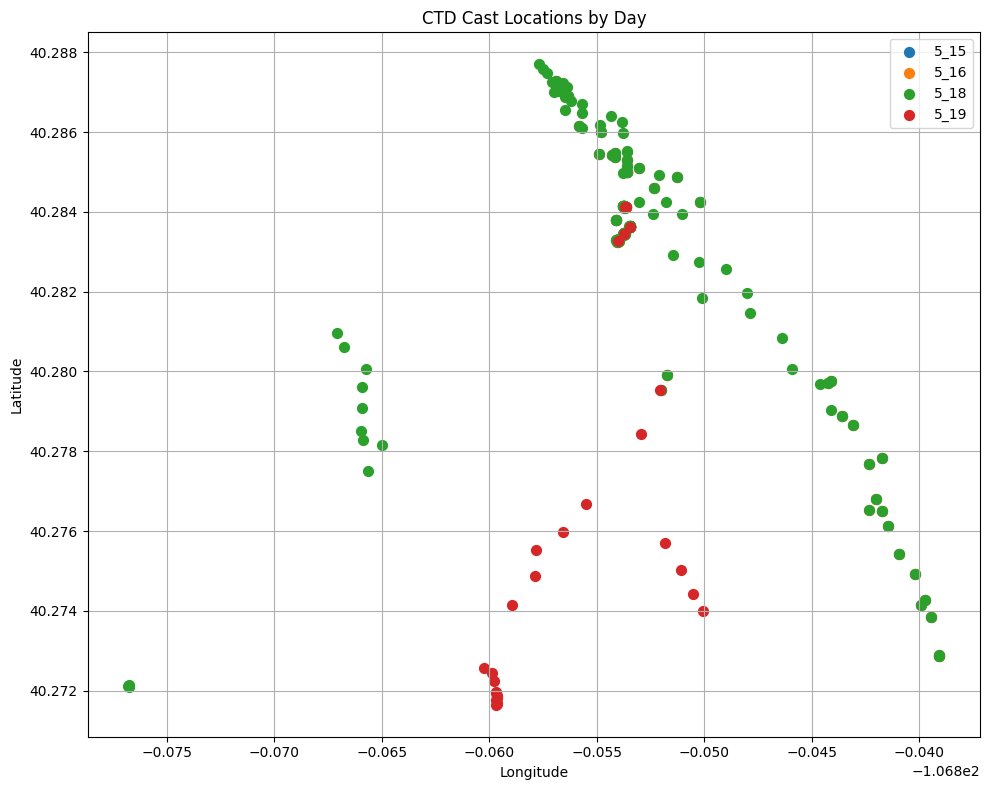

In [11]:
import os
import matplotlib.pyplot as plt

base_paths = {
    '5_15': '/content/extracted_5_15',
    '5_16': '/content/extracted_5_16',
    '5_17': '/content/extracted_5_17',
    '5_18': '/content/extracted_5_18',
    '5_19': '/content/extracted_5_19'
}

gps_records = []

for label, base in base_paths.items():
    data_dir = os.path.join(base, 'Data') if os.path.exists(os.path.join(base, 'Data')) else base
    csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

    for f in csv_files:
        file_path = os.path.join(data_dir, f)
        lat = None
        lon = None

        try:
            with open(file_path, 'r') as file:
                for line in file:
                    if '% Start latitude' in line:
                        lat = float(line.split(',')[1].strip()) if ',' in line else float(line.split()[1])
                    elif '% Start longitude' in line:
                        lon = float(line.split(',')[1].strip()) if ',' in line else float(line.split()[1])
                    if lat is not None and lon is not None:
                        gps_records.append({
                            'Latitude': lat,
                            'Longitude': lon,
                            'File': f,
                            'Date': label
                        })
                        break  # Stop scanning lines once GPS is found

        except Exception as e:
            print(f"❌ Error in {f}: {e}")

# Plot if we have any results
if gps_records:
    import pandas as pd
    gps_df = pd.DataFrame(gps_records)

    print(f"✅ Parsed {len(gps_df)} cast locations.")
    display(gps_df.head())

    # Spatial plot
    plt.figure(figsize=(10, 8))
    for date, group in gps_df.groupby("Date"):
        plt.scatter(group['Longitude'], group['Latitude'], label=date, s=50)

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("CTD Cast Locations by Day")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("🚫 No valid GPS coordinates found.")


In [12]:
!pip install rasterio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 97.0 MB/s eta 0:00:00


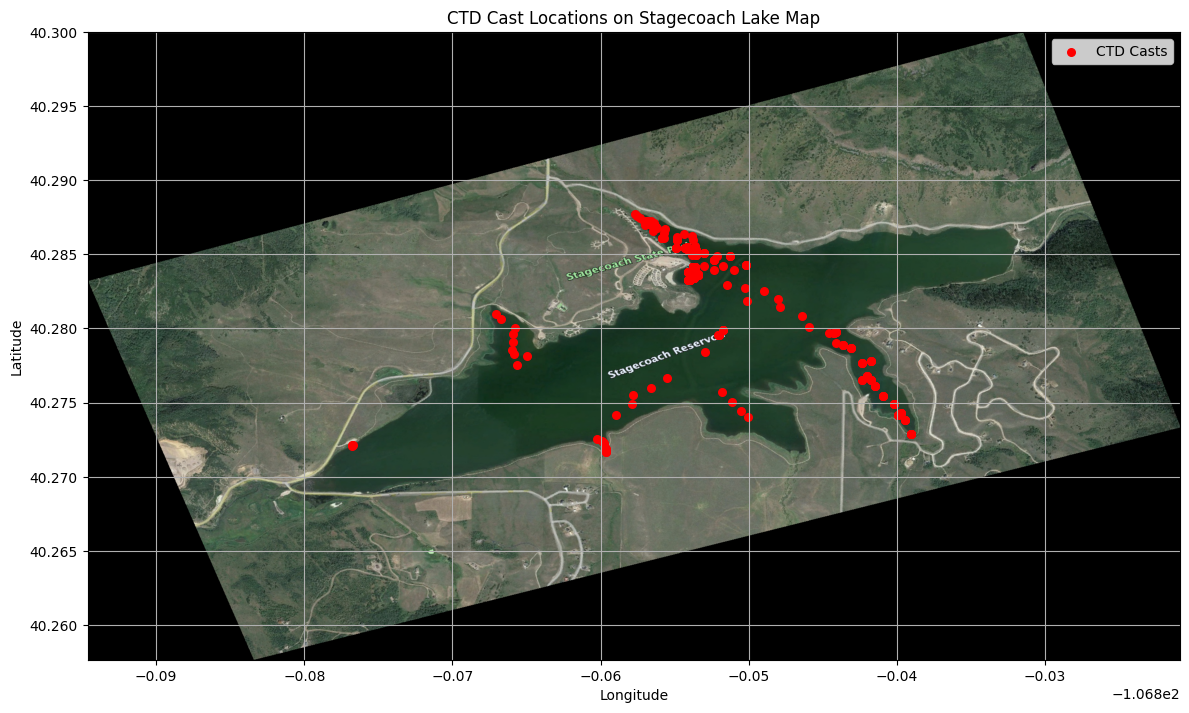

In [13]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Load GPS DataFrame if not already in memory
# gps_df = pd.read_csv('/content/ctd_cast_locations.csv')

# Load the GeoTIFF
tif_path = "/content/drive/MyDrive/Misc/stagecoach.tif"
with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(12, 10))
    show(src, ax=ax)

    # Plot GPS points (in same CRS as image: assumes lat/lon WGS84)
    ax.scatter(gps_df['Longitude'], gps_df['Latitude'], c='red', s=30, label='CTD Casts')

    ax.set_title("CTD Cast Locations on Stagecoach Lake Map")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()


In [14]:
from shapely.geometry import Point, Polygon
import pandas as pd

# Define dock polygon from your coordinates
dock_coords = [
    (-106.854340, 40.283481),
    (-106.854101, 40.283199),
    (-106.853171, 40.283739),
    (-106.853466, 40.283944)
]
dock_polygon = Polygon(dock_coords)

# Filter points
gps_df['geometry'] = gps_df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
dock_df = gps_df[gps_df['geometry'].apply(dock_polygon.contains)].copy()

print(f"✅ Found {len(dock_df)} CTD casts within dock area.")
dock_df.drop(columns='geometry', inplace=True)  # cleanup
display(dock_df.head())


✅ Found 84 CTD casts within dock area.


,Latitude,Longitude,File,Date
8,40.283298,-106.854094,CC2435009_20250514_195240.csv,5_15
12,40.283283,-106.854040,CC2435009_20250513_195019.csv,5_15
15,40.283628,-106.853450,CC2435009_20250513_194404.csv,5_15
20,40.283442,-106.853767,CC2435009_20250513_195323.csv,5_15
25,40.283458,-106.853738,CC2435009_20250514_195603.csv,5_15


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('File').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Latitude', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('File')):
  _plot_series(series, series_name, i)
  fig.legend(title='File', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('File')):
  _plot_series(series, series_name, i)
  fig.legend(title='File', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Longitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('File')):
  _plot_series(series, series_name, i)
  fig.legend(title='File', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('File')):
  _plot_series(series, series_name, i)
  fig.legend(title='File', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Latitude')

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Latitude'].plot(kind='line', figsize=(8, 4), title='Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['File'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='File', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['File'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Latitude', y='File', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['File'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Longitude', y='File', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

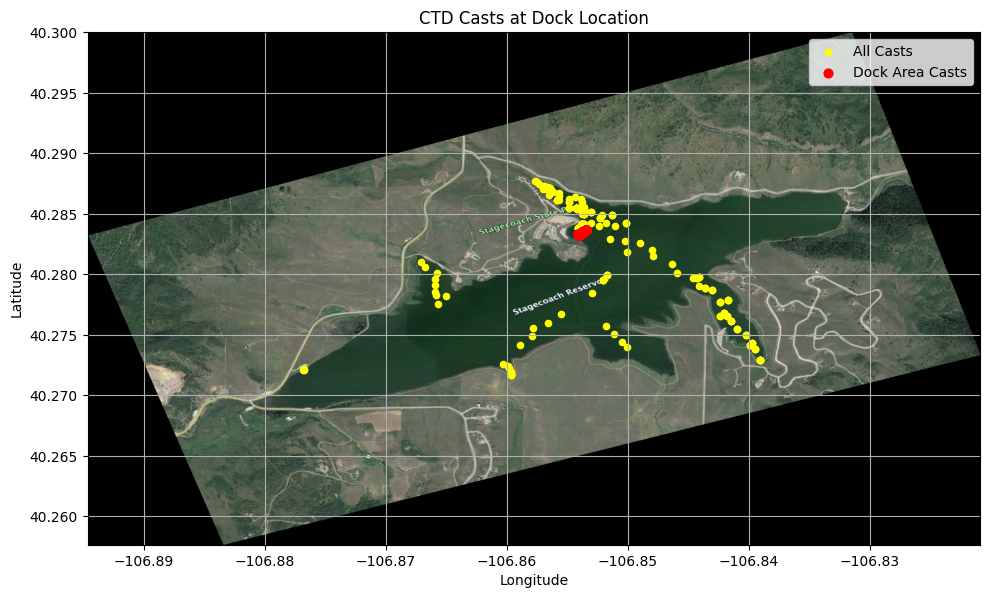

In [19]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

tif_path = "/content/drive/MyDrive/Misc/stagecoach.tif"

with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(src, ax=ax)

    # Plot full points (light gray), dock points (red)
    ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax.scatter(gps_df['Longitude'], gps_df['Latitude'], color='yellow', s=20, label='All Casts')
    ax.scatter(dock_df['Longitude'], dock_df['Latitude'], color='red', s=40, label='Dock Area Casts')

    ax.set_title("CTD Casts at Dock Location")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.show()

In [16]:
dock_df.to_csv('/content/ctd_casts_at_dock.csv', index=False)
print("📄 Saved dock-filtered cast list to /content/drive/MyDrive/Misc/Data/ctd_casts_at_dock.csv")

📄 Saved dock-filtered cast list to /content/drive/MyDrive/Misc/Data/ctd_casts_at_dock.csv


In [18]:
dock_df.to_csv('/content/drive/MyDrive/Misc/Data/ctd_casts_at_dock.csv', index=False)
print("📄 Saved dock-filtered cast list to /content/drive/MyDrive/Misc/Data/ctd_casts_at_dock.csv")

📄 Saved dock-filtered cast list to /content/drive/MyDrive/Misc/Data/ctd_casts_at_dock.csv


In [25]:
import pandas as pd
import os
from shapely.geometry import Point, Polygon
!pip install ace_tools
import ace_tools as tools

# Define the polygon around the dock
dock_polygon = Polygon([
    (-106.854340, 40.283481),
    (-106.854101, 40.283199),
    (-106.853171, 40.283739),
    (-106.853466, 40.283944)
])

# Base directory where data folders are extracted
base_dirs = [
    '/content/extracted_5_15/Data',
    '/content/extracted_5_16/Data',
    '/content/extracted_5_17/Data',
    '/content/extracted_5_18/Data',
    '/content/extracted_5_19/Data'
]

# Prepare storage for valid cast dataframes
valid_casts = []

# Search all CSV files in extracted folders
for folder in base_dirs:
    if os.path.exists(folder):
        for file in os.listdir(folder):
            if file.endswith('.csv'):
                file_path = os.path.join(folder, file)
                try:
                    # Read lines to detect where the table begins
                    with open(file_path, 'r') as f:
                        lines = f.readlines()

                    header_index = None
                    lat, lon = None, None

                    # Try to find the lat/lon from metadata
                    for line in lines:
                        if 'Latitude' in line:
                            try:
                                lat = float(line.split(',')[-1])
                            except:
                                continue
                        elif 'Longitude' in line:
                            try:
                                lon = float(line.split(',')[-1])
                            except:
                                continue

                    if lat is None or lon is None:
                        continue

                    # Check if point is inside dock polygon
                    point = Point(lon, lat)
                    if not dock_polygon.contains(point):
                        continue

                    # Detect table start
                    for idx, line in enumerate(lines):
                        if 'Pressure' in line and 'Temperature' in line:
                            header_index = idx
                            break

                    if header_index is None:
                        continue

                    df = pd.read_csv(file_path, skiprows=header_index)
                    df = df.dropna(how='all')
                    df['Latitude'] = lat
                    df['Longitude'] = lon
                    df['File'] = file
                    valid_casts.append(df)
                except Exception as e:
                    continue

# Combine all valid casts into a single DataFrame
if valid_casts:
    final_df = pd.concat(valid_casts, ignore_index=True)
    final_csv_path = '/content/drive/MyDrive/Misc/Data/ctd_casts_within_dock_polygon.csv'
    final_df.to_csv(final_csv_path, index=False)
else:
    final_df = pd.DataFrame()

tools.display_dataframe_to_user(name="Dock Polygon CTD Data", dataframe=final_df)


ModuleNotFoundError: No module named 'ace_tools'

In [29]:
import os
import pandas as pd
from shapely.geometry import Point, Polygon
from IPython.display import display

# Define base paths for each day’s extracted directory
base_paths = {
    '5_15': '/content/extracted_5_15',
    '5_16': '/content/extracted_5_16',
    '5_17': '/content/extracted_5_17',
    '5_18': '/content/extracted_5_18',
    '5_19': '/content/extracted_5_19'
}

# Define the polygon surrounding the dock (lon, lat order)
dock_polygon = Polygon([
    (-106.854340, 40.283481),
    (-106.854101, 40.283199),
    (-106.853171, 40.283739),
    (-106.853466, 40.283944)
])

def extract_cast_metadata(filepath):
    """Extract GPS coordinates and header info from a CTD file"""
    with open(filepath, 'r') as f:
        lines = f.readlines()

    metadata = {}
    for line in lines:
        if line.startswith('%'):
            parts = line.strip('% \n').split(',', 1)
            if len(parts) == 2:
                metadata[parts[0].strip()] = parts[1].strip()
        elif line.strip() == '':
            continue
        else:
            break  # stop at data rows
    return metadata

def extract_cast_data(filepath):
    """Extract data portion of CTD cast into DataFrame"""
    with open(filepath, 'r') as f:
        lines = f.readlines()

    # Find start of data
    for i, line in enumerate(lines):
        if line.strip().startswith('Pressure'):
            header_line = i
            break
    else:
        return None  # no data found

    try:
        df = pd.read_csv(filepath, skiprows=header_line)
        return df
    except Exception as e:
        print(f"⚠️ Could not read data from {os.path.basename(filepath)}: {e}")
        return None

# Store results
matched_casts = []

for day, folder in base_paths.items():
    for fname in os.listdir(folder):
        if not fname.endswith('.csv'):
            continue
        fpath = os.path.join(folder, fname)

        try:
            metadata = extract_cast_metadata(fpath)
            lat = float(metadata.get('Start latitude', 'nan'))
            lon = float(metadata.get('Start longitude', 'nan'))
        except Exception as e:
            print(f"⚠️ Skipping {fname}: metadata error — {e}")
            continue

        if not (pd.notna(lat) and pd.notna(lon)):
            continue

        point = Point(lon, lat)
        if dock_polygon.contains(point):
            data = extract_cast_data(fpath)
            if data is not None:
                # Add metadata to each row
                for key, value in metadata.items():
                    data[key] = value
                data['Source file'] = fname
                matched_casts.append(data)

# Combine all casts into one DataFrame
if matched_casts:
    dock_casts_df = pd.concat(matched_casts, ignore_index=True)
    dock_casts_df.to_csv('/content/dock_casts_combined.csv', index=False)
    print("✅ Saved combined dock casts to /content/dock_casts_combined.csv")
    display(dock_casts_df.head())
else:
    print("❌ No casts found within dock polygon.")


<ipython-input-29-bedf380c774e>:92: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dock_casts_df = pd.concat(matched_casts, ignore_index=True)


✅ Saved combined dock casts to /content/dock_casts_combined.csv


,Pressure (Decibar),Depth (Meter),Temperature (Celsius),Conductivity (MicroSiemens per Centimeter),Specific conductance (MicroSiemens per Centimeter),Salinity (Practical Salinity Scale),Sound velocity (Meters per Second),Density (Kilograms per Cubic Meter),Device,File name,...,End GPS horizontal error(Meter),End GPS vertical error(Meter),End GPS number of satellites,Cast duration (Seconds),Samples per second,Electronics calibration date,Conductivity calibration date,Temperature calibration date,Pressure calibration date,Source file
0,0.15,0.153176,11.307945,313.606964,431.870988,0.205179,1452.648833,999.737318,CC2435009,CC2435009_20250518_184557,...,22.090000152587892,37.252998352050784,9,33.6,5,0001-01-01,2024-10-09,2024-10-07,2024-09-17,CC2435009_20250518_184557.csv
1,0.45,0.458895,11.249229,312.466781,430.997834,0.204718,1452.427325,999.744572,CC2435009,CC2435009_20250518_184557,...,22.090000152587892,37.252998352050784,9,33.6,5,0001-01-01,2024-10-09,2024-10-07,2024-09-17,CC2435009_20250518_184557.csv
2,0.75,0.764823,11.175627,310.996488,429.842563,0.204111,1452.147937,999.753218,CC2435009,CC2435009_20250518_184557,...,22.090000152587892,37.252998352050784,9,33.6,5,0001-01-01,2024-10-09,2024-10-07,2024-09-17,CC2435009_20250518_184557.csv
3,1.05,1.070746,11.034823,309.859786,429.944922,0.204075,1451.609005,999.769148,CC2435009,CC2435009_20250518_184557,...,22.090000152587892,37.252998352050784,9,33.6,5,0001-01-01,2024-10-09,2024-10-07,2024-09-17,CC2435009_20250518_184557.csv
4,1.35,1.376666,10.938729,309.098943,430.035993,0.204059,1451.241645,999.780332,CC2435009,CC2435009_20250518_184557,...,22.090000152587892,37.252998352050784,9,33.6,5,0001-01-01,2024-10-09,2024-10-07,2024-09-17,CC2435009_20250518_184557.csv
